Accuracy: 0.7416666666666667


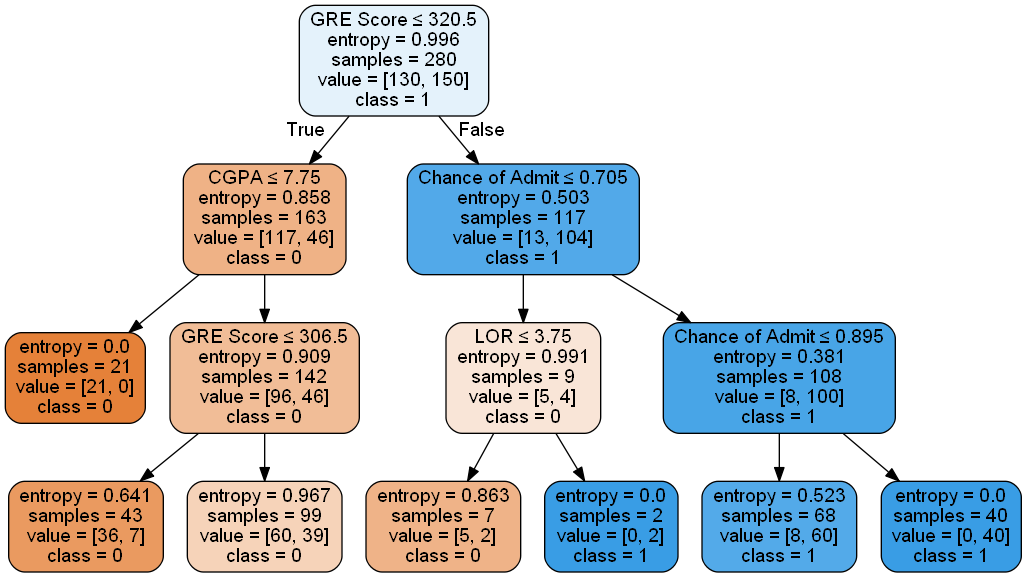

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


col_names = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Chance of Admit']
pima = pd.read_csv("Admision.csv", header=None, names=col_names)


pima.head()


feature_cols = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Chance of Admit']
X = pima[feature_cols]
y = pima.Research


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Admision.png')
Image(graph.create_png())